In [1]:
from datetime import datetime
from secedgar.filings import Filing, FilingType
import os
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
os.chdir(os.path.join(os.getcwd(), ".."))

In [4]:
from api.api_utils import (create_dir, make_patch_spines_invisible, create_ticker2name, 
                           create_combined_data, download_filing_4,
                           InsiderAggregators, calculate_aggregates_per_insider,
                           read_all_form_4, 
                           visualization_insider_stock)

**Inputs**

In [5]:
tot_companies = 1 # None = All sp100

**Paths**

In [6]:
data_path = os.path.join(os.getcwd(), "data")
data_filings_path = os.path.join(data_path, "filings")
sp_100_file = os.path.join(data_path, "sp-100-index-07-02-2020.csv")

create_dir(data_filings_path)

In [7]:
sp100_companies = pd.read_csv(sp_100_file)[:-1]
sp100_symbols = sp100_companies["Symbol"].unique()

In [10]:
symbol = "aapl"
filing = Filing(cik_lookup=symbol.lower(),
                filing_type=FilingType.FILING_10K,
                start_date=datetime(2019, 7, 1),
                end_date=datetime(2020, 6, 30))
filing.save(data_filings_path)

In [11]:
Filing?

In [9]:
for symbol in sp100_symbols[:tot_companies]:
    current_path = os.path.join(data_filings_path, symbol.lower())
    if not(os.path.exists(current_path)):
        filing = Filing(cik_lookup=symbol.lower(),
                        filing_type=FilingType.FILING_10K,
                        start_date=datetime(2019, 7, 1),
                        end_date=datetime(2020, 6, 30))
        filing.save(data_filings_path)

In [ ]:
def download_filing_4(symbol, data_filings_path,
                      start_date=datetime(2019, 7, 1),
                      end_date=datetime(2020, 6, 30)):
    """
    Download Form 4 from SEC. 
    Downloads all the info about the form 4 in multiple txt files.
    TODO:
    Look if it overwrites.
    Save a file with metadata of already looked dates.
    Create a folder for the symbol and for the looked filing
    """
    current_path = os.path.join(data_filings_path, symbol.lower())
    if not(os.path.exists(current_path)):
        filing = Filing(cik_lookup=symbol.lower(),
                        filing_type=FilingType.FILING_4,
                        start_date=start_date,
                        end_date=end_date)
        filing.save(data_filings_path)
    else:
        print("Already downloaded")

In [7]:
for symbol in sp100_symbols[:tot_companies]:
    print("symbol: ",symbol)
    download_filing_4(symbol, data_filings_path,
                      start_date=datetime(2019, 7, 1),
                      end_date=datetime(2020, 6, 30))

symbol:  AAPL
Already downloaded
symbol:  ABBV
Already downloaded
symbol:  ABT
Already downloaded


In [8]:
data = read_all_form_4(data_filings_path)

In [9]:
data.head()

,transactiondate,transactionshares,transactionpricepershare,transactioncode,officerTitle,rptOwnerName,issuername,ticker,transactionvalue
0,2019-08-24,560000,NaN,M,Chief Executive Officer,COOK TIMOTHY D,Apple Inc.,AAPL,NaN
1,2019-08-12,17500,0.00,M,None,LEVINSON ARTHUR D,Apple Inc.,AAPL,0.0
2,2019-10-07,17010,229.34,S,"Senior Vice President, CFO",Maestri Luca,Apple Inc.,AAPL,3901073.4
3,2019-11-05,37394,0.00,M,None,LEVINSON ARTHUR D,Apple Inc.,AAPL,0.0
4,2019-08-02,1177,0.00,G,None,BELL JAMES A,APPLE INC,AAPL,0.0


## Visualization

In [10]:
dict_frames = create_combined_data(data)
ticker2name = create_ticker2name(data)

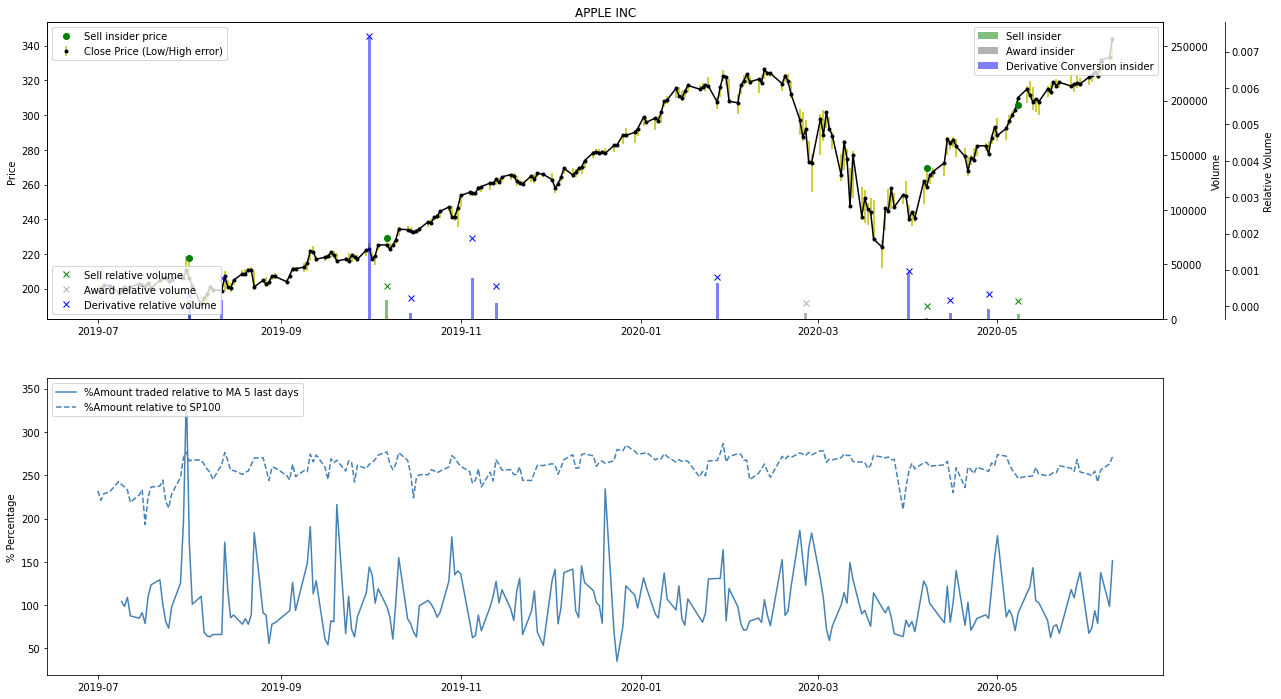

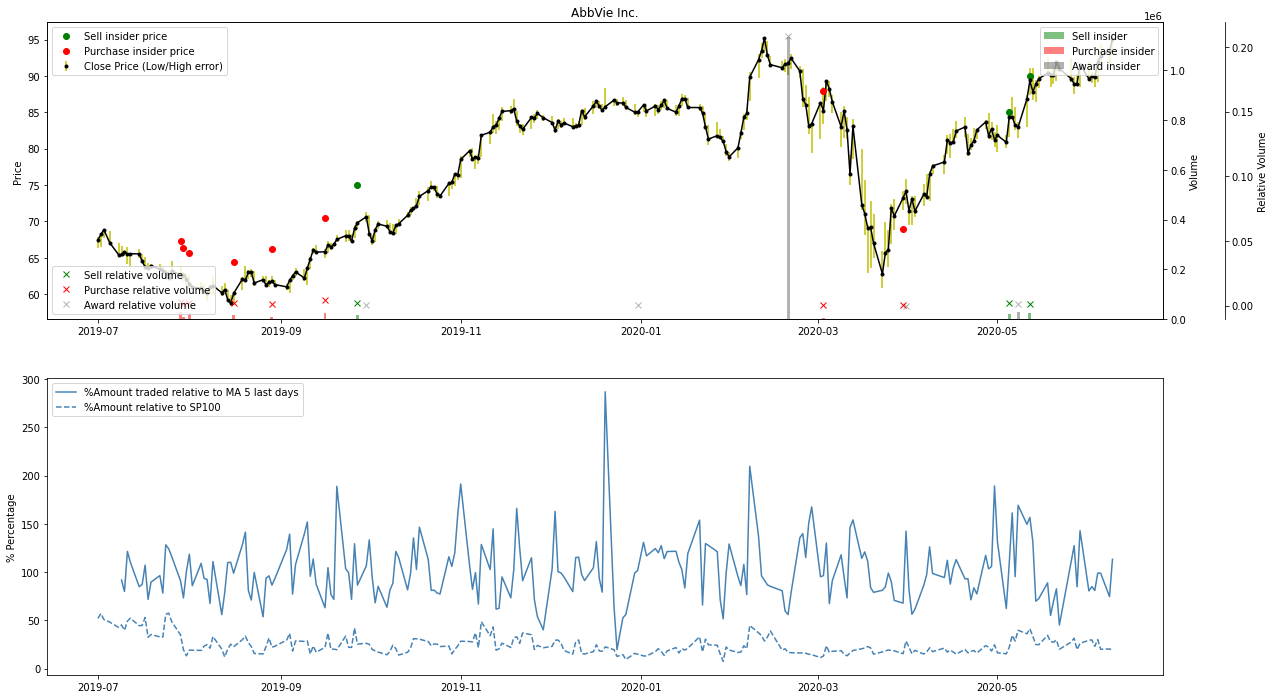

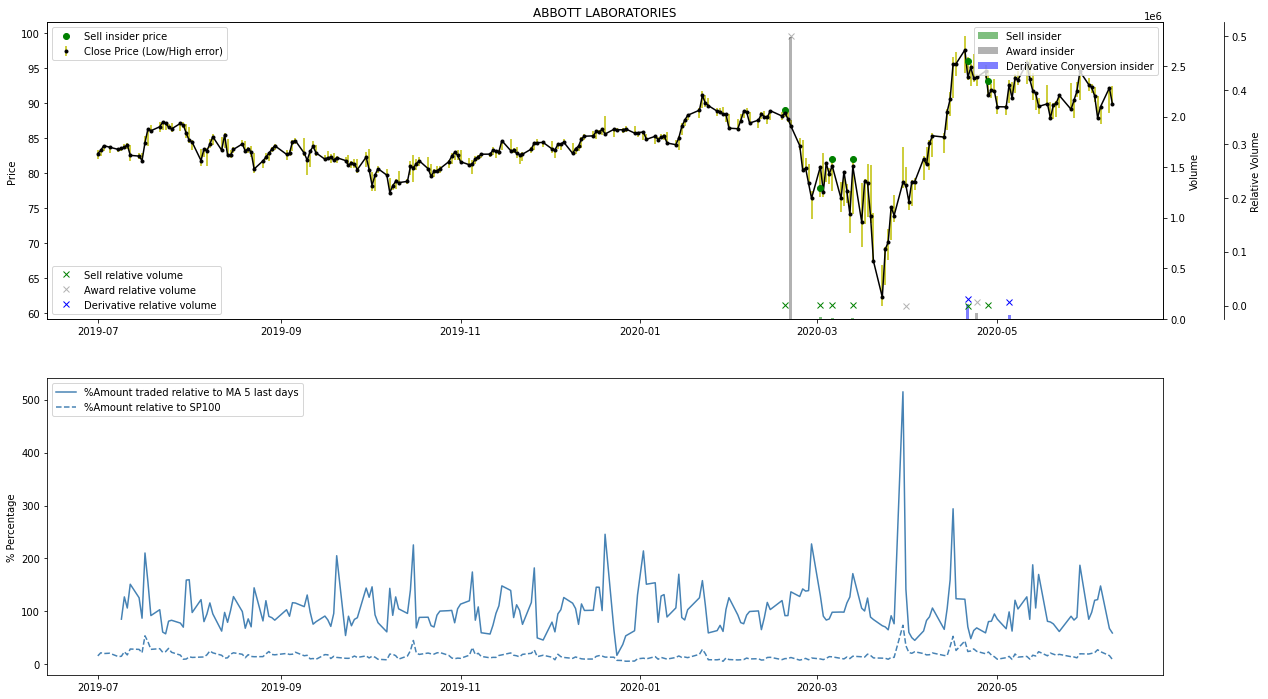

In [11]:
for key, val in dict_frames.items():
    visualization_insider_stock(key, val, ticker2name, save_path=None, from_api=False)

In [12]:
dict_top_insiders = {}
for symbol in sp100_symbols[:tot_companies]:
    aggregates_insider = calculate_aggregates_per_insider(data, symbol)
    print(aggregates_insider.to_string())

                                  officerTitle transactionpricepershare transactionshares transactioncode                           
                                         title        mean_exclude_le_0               sum      total_sell total_options total_awards
rptOwnerName                                                                                                                        
COOK TIMOTHY D         Chief Executive Officer                      NaN            590580               0             1            0
Maestri Luca        Senior Vice President, CFO                   249.39            214451               2             2            1
WILLIAMS JEFFREY E                         COO                      NaN            196241               0             2            1
LEVINSON ARTHUR D                         None                      NaN             74677               0             4            1
Adams Katherine L.       SVP, GC and Secretary                      N

In [14]:
aggregates_insider.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr>\n      <th></th>\n      <th>officerTitle</th>\n      <th>transactionpricepershare</th>\n      <th>transactionshares</th>\n      <th colspan="3" halign="left">transactioncode</th>\n    </tr>\n    <tr>\n      <th></th>\n      <th>title</th>\n      <th>mean_exclude_le_0</th>\n      <th>sum</th>\n      <th>total_sell</th>\n      <th>total_options</th>\n      <th>total_awards</th>\n    </tr>\n    <tr>\n      <th>rptOwnerName</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>WHITE MILES D</th>\n      <td>Executive Chairman</td>\n      <td>79.19</td>\n      <td>464883</td>\n      <td>0</td>\n      <td>0</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>Ford Robert B</th>\n      <td>President and CEO</td>\n      <td>79.19</td>\n      <td>428452</td>\n      <td>0</td>\n      <td>0</td>\n      <td>1</td>\n    </tr>\n    <t